In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [153]:
df1 = pd.read_csv("BIKE DETAILS.csv")
df1

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [154]:
df1.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


In [155]:
df1.shape

(1061, 7)

In [156]:
#1. What is the range of selling prices in the dataset
min_price = df1['selling_price'].min()
max_price = df1['selling_price'].max()
print(f"The range of selling prices is from {min_price} to {max_price}.")

The range of selling prices is from 5000 to 760000.


In [157]:
#2. What is the median selling price for bikes in the dataset
median_sp = df1['selling_price'].median()
median_sp

45000.0

In [158]:
#3. What is the most common seller type
df1['seller_type'].mode()

,seller_type
0,Individual


In [159]:
#4. How many bikes have driven more than 50,000 kilometers
bikes_over_50k_km = df1['km_driven'] > 50000
no_of_bikes = len(bikes_over_50k_km)
print(f"no. of bikes driven over 50000km are {no_of_bikes}")

no. of bikes driven over 50000km are 1061


In [160]:
#5. What is the average km_driven value for each ownership type
average_km_by_owner = df1.groupby('owner')['km_driven'].mean()
display(average_km_by_owner)

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [161]:
#6. What proportion of bikes are from the year 2015 or older

In [162]:
#7. What is the trend of missing values across the dataset
df1.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [163]:
#8. What is the highest ex_showroom_price recorded, and for which bike
max_ex_showroom = df1['ex_showroom_price'].max()
highest_ex_showroom_bikes = df1[df1['ex_showroom_price'] == max_ex_showroom]
display(highest_ex_showroom_bikes)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


In [164]:
#9. What is the total number of bikes listed by each seller type
total_no_of_bikes_by_seller_type = df1['seller_type'].value_counts()
print(total_no_of_bikes_by_seller_type)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


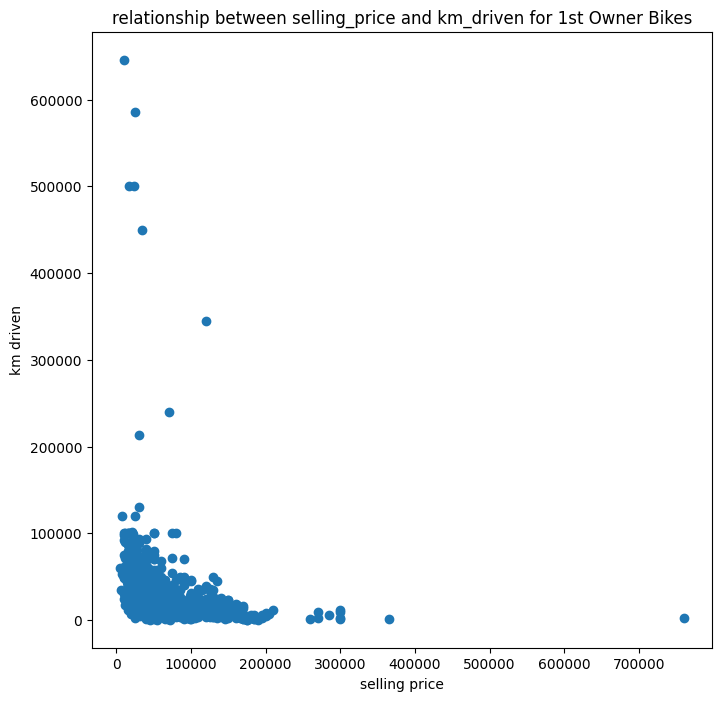

In [165]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes
first_owner_bikes = df1[df1['owner'] == '1st owner']

plt.figure(figsize=(8, 8))
plt.scatter(x=first_owner_bikes['selling_price'], y=first_owner_bikes['km_driven'])
plt.ylabel('km driven')
plt.xlabel('selling price')
plt.title('relationship between selling_price and km_driven for 1st Owner Bikes')
plt.show()

In [166]:
#11. Identify and remove outliers in the km_driven column using the IQR method

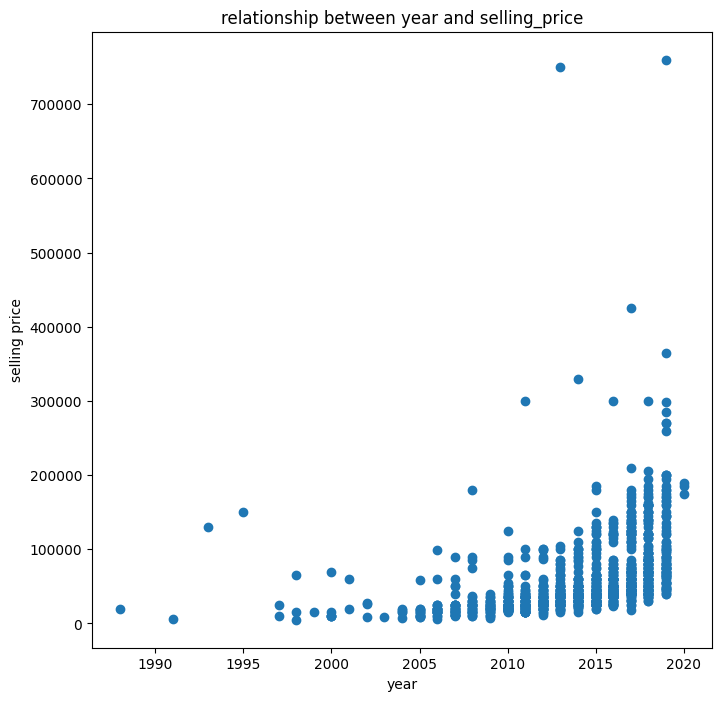

In [167]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price
plt.figure(figsize=(8, 8))
plt.scatter(x=df1['year'], y=df1['selling_price'])
plt.xlabel('year')
plt.ylabel('selling price')
plt.title('relationship between year and selling_price')
plt.show()

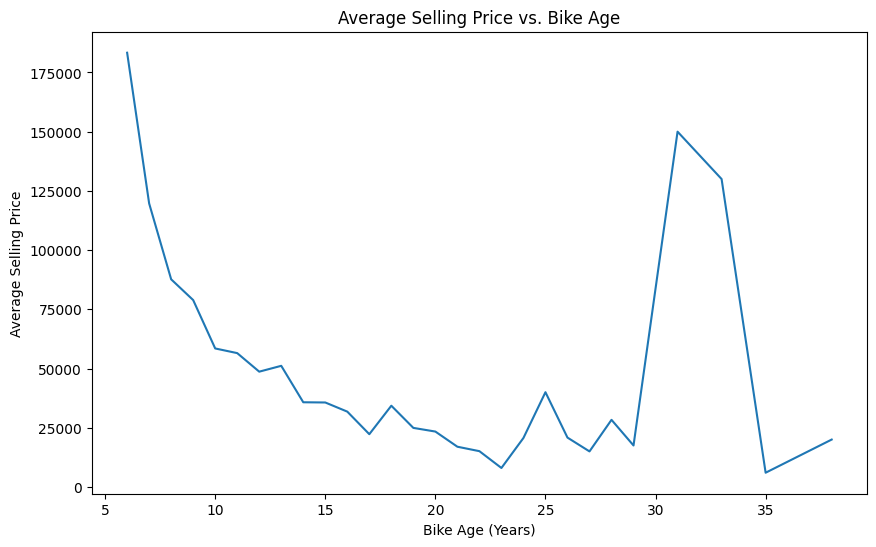

In [168]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)
import datetime
current_year = datetime.datetime.now().year
df1['bike_age'] = current_year - df1['year']

average_price_by_age = df1.groupby('bike_age')['selling_price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='bike_age', y='selling_price', data=average_price_by_age)
plt.title('Average Selling Price vs. Bike Age')
plt.xlabel('Bike Age (Years)')
plt.ylabel('Average Selling Price')
plt.show()

In [169]:
#14. Which bike names are priced significantly above the average price for their manufacturing year
avg_price_by_year = df1.groupby('year')['selling_price'].transform('mean')

bikes_above_average_price = df1[df1['selling_price'] > avg_price_by_year]
display(bikes_above_average_price[['name', 'year', 'selling_price']])

,name,year,selling_price
0,Royal Enfield Classic 350,2019,175000
2,Royal Enfield Classic Gunmetal Grey,2018,150000
3,Yamaha Fazer FI V 2.0 [2016-2018],2015,65000
7,Royal Enfield Bullet 350 [2007-2011],2008,180000
13,Yamaha YZF R3,2019,365000
...,...,...,...
1004,Bajaj Pulsar NS 200,2016,60000
1005,TVS Apache RTR 160,2014,60000
1008,Bajaj Pulsar 220 F,2012,52000
1012,Bajaj Pulsar NS 200,2014,50000


In [170]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
df1.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64
bike_age,int64


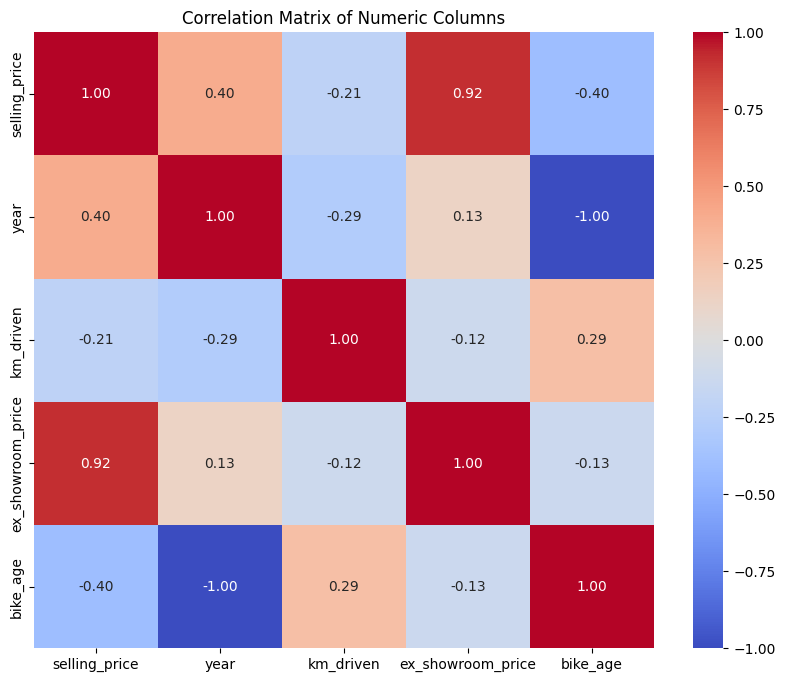

In [171]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_cols = df1.select_dtypes(include=['number'])
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [172]:
df2 = pd.read_csv("Car Sale.csv")
df2

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [173]:
df2.dtypes

,0
Car_id,object
Date,object
Customer Name,object
Gender,object
Annual Income,int64
Dealer_Name,object
Company,object
Model,object
Engine,object
Transmission,object


In [174]:
df2.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [175]:
df2 = df2.dropna()

In [176]:
df2.dtypes

,0
Car_id,object
Date,object
Customer Name,object
Gender,object
Annual Income,int64
Dealer_Name,object
Company,object
Model,object
Engine,object
Transmission,object


In [177]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Dealer_No '] = df2['Dealer_No '].astype(str).str.replace("-", "").astype(np.int64)

In [178]:
df2.dtypes

,0
Car_id,object
Date,datetime64[ns]
Customer Name,object
Gender,object
Annual Income,int64
Dealer_Name,object
Company,object
Model,object
Engine,object
Transmission,object


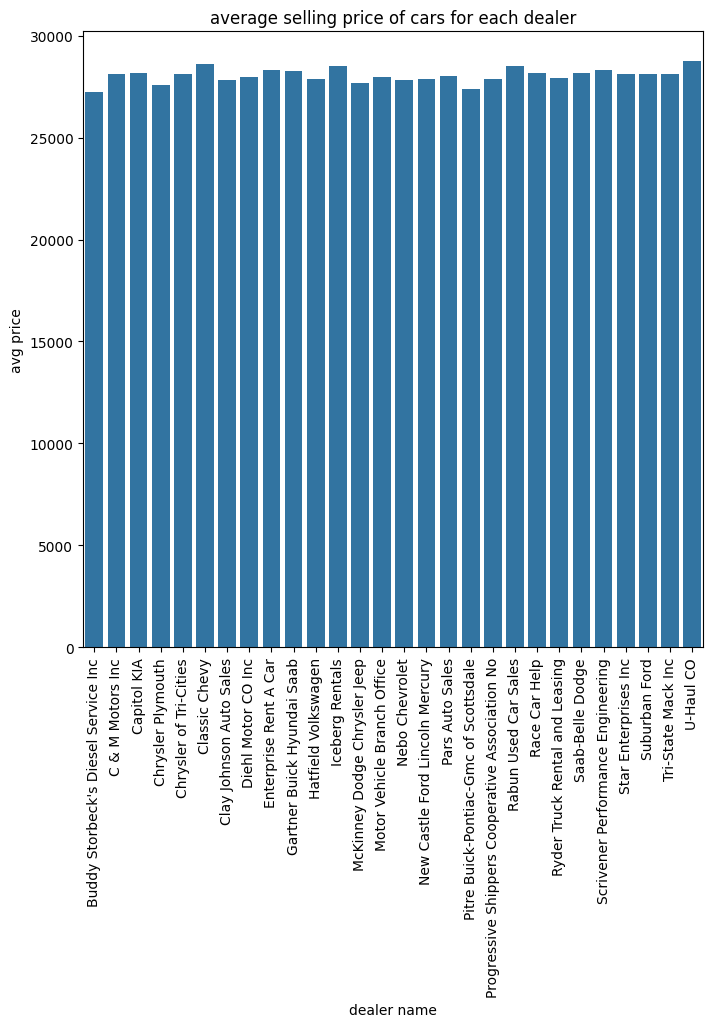

In [179]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers
avg_price_dealer = df2.groupby('Dealer_Name')['Price ($)'].mean()
plt.figure(figsize = (8,8))
sns.barplot(x = avg_price_dealer.index, y = avg_price_dealer.values)
plt.xlabel('dealer name')
plt.ylabel('avg price')
plt.xticks(rotation = 90)
plt.title("average selling price of cars for each dealer")
plt.show()

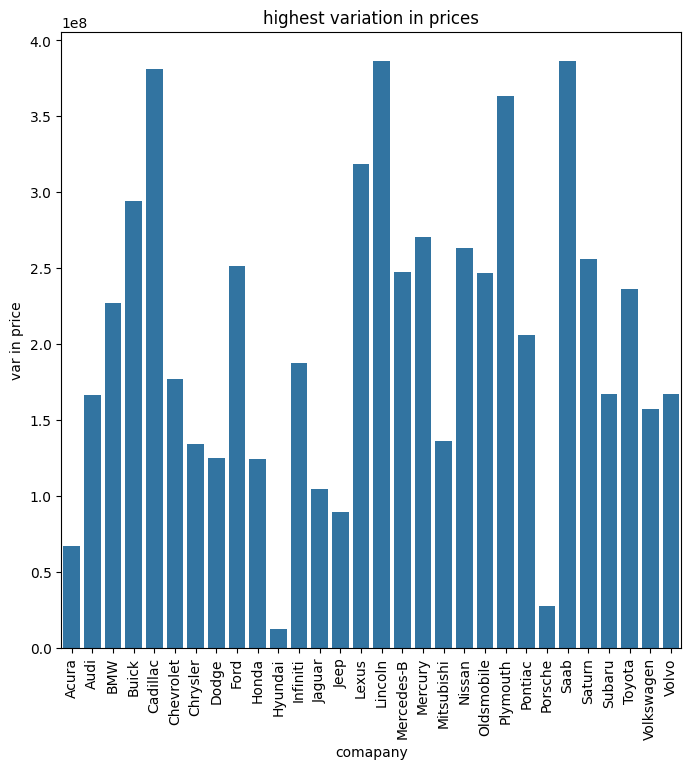

In [180]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends
variance_in_price_by_co = df2.groupby('Company')['Price ($)'].var()
plt.figure(figsize = (8,8))
sns.barplot(x = variance_in_price_by_co.index, y = variance_in_price_by_co.values)
plt.xlabel('comapany')
plt.ylabel('var in price')
plt.xticks(rotation = 90)
plt.title("highest variation in prices")
plt.show()

<Axes: xlabel='Transmission', ylabel='Price ($)'>

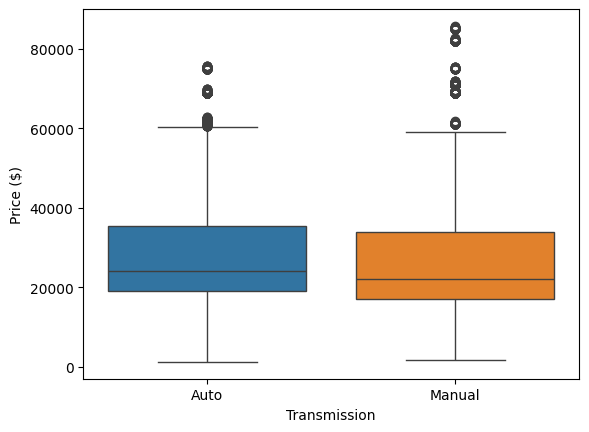

In [181]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare
sns.boxplot(x = 'Transmission', y = 'Price ($)', data = df2, hue = 'Transmission')

<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

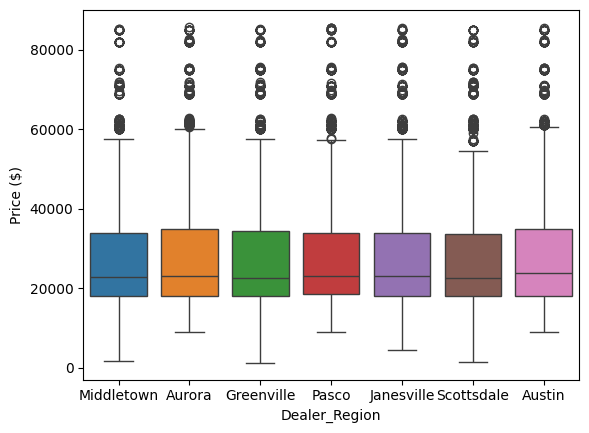

In [182]:
#4. What is the distribution of car prices across different regions
sns.boxplot(x = 'Dealer_Region', y = 'Price ($)', data = df2, hue = 'Dealer_Region')

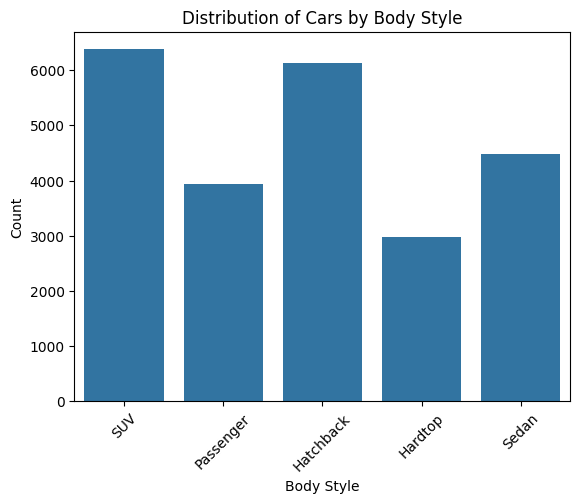

In [183]:
#5. What is the distribution of cars based on body styles
sns.countplot(x = 'Body Style', data = df2)
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

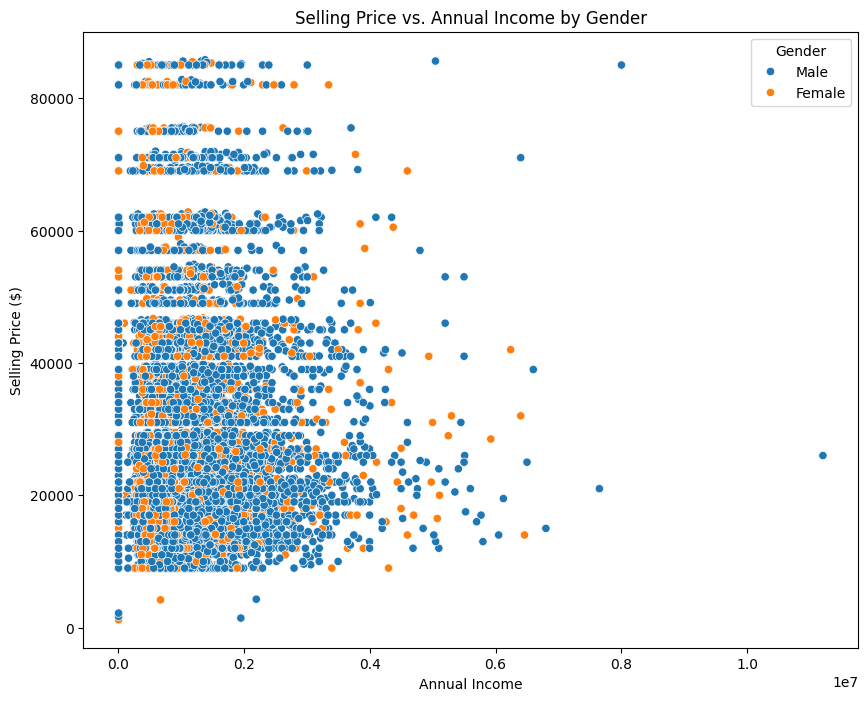

In [184]:
#6. How does the average selling price of cars vary by customer gender and annual income
plt.figure(figsize = (10, 8))
sns.scatterplot(x = df2['Annual Income'], y = df2['Price ($)'], hue = df2['Gender'])
plt.title('Selling Price vs. Annual Income by Gender')
plt.xlabel('Annual Income')
plt.ylabel('Selling Price ($)')
plt.show()

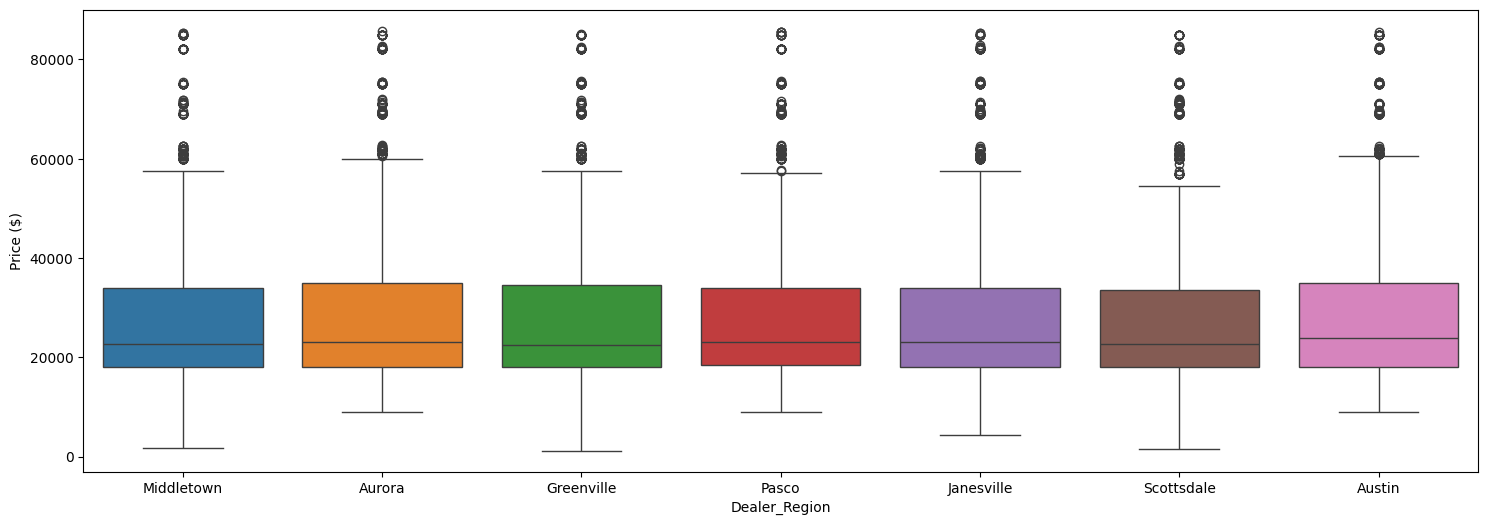

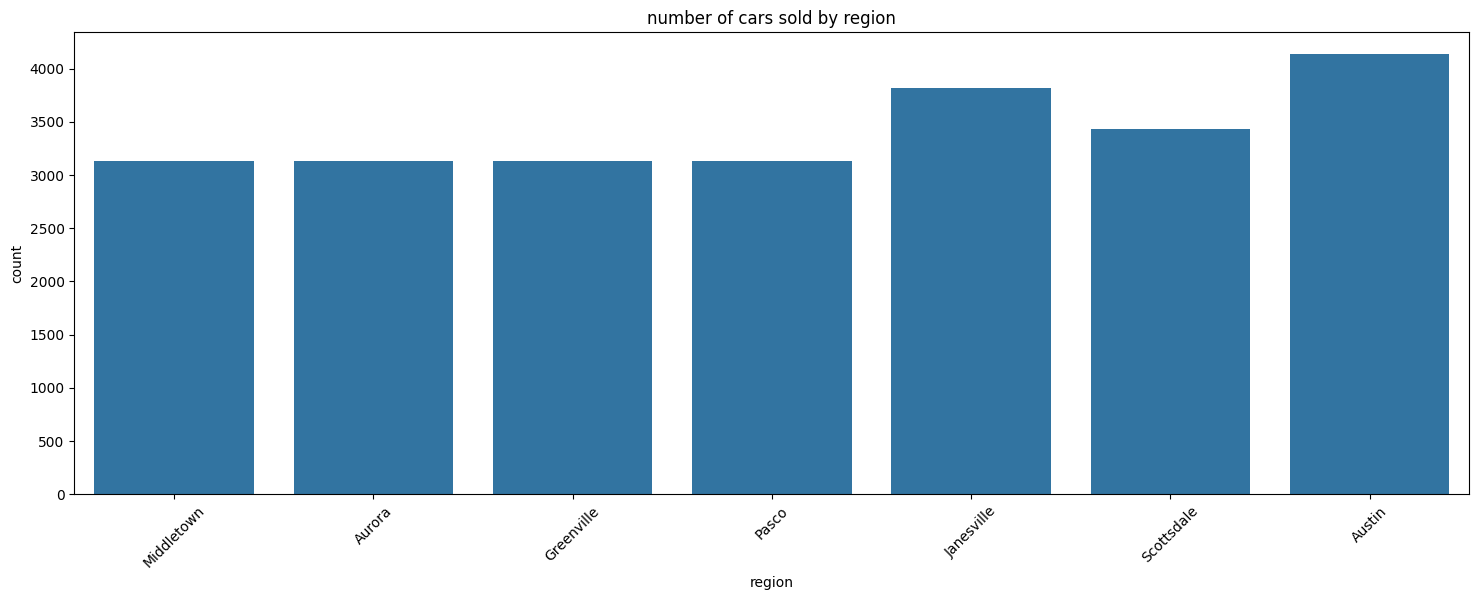

In [185]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region
plt.subplots(1,1, figsize = (18,6))
sns.boxplot(x = 'Dealer_Region', y = 'Price ($)', data = df2, hue = 'Dealer_Region')
plt.subplots(1,1, figsize = (18,6))
sns.countplot(x = 'Dealer_Region', data = df2)
plt.title('number of cars sold by region')
plt.xlabel('region')
plt.ylabel('count')
plt.xticks(rotation = 45)
plt.show()

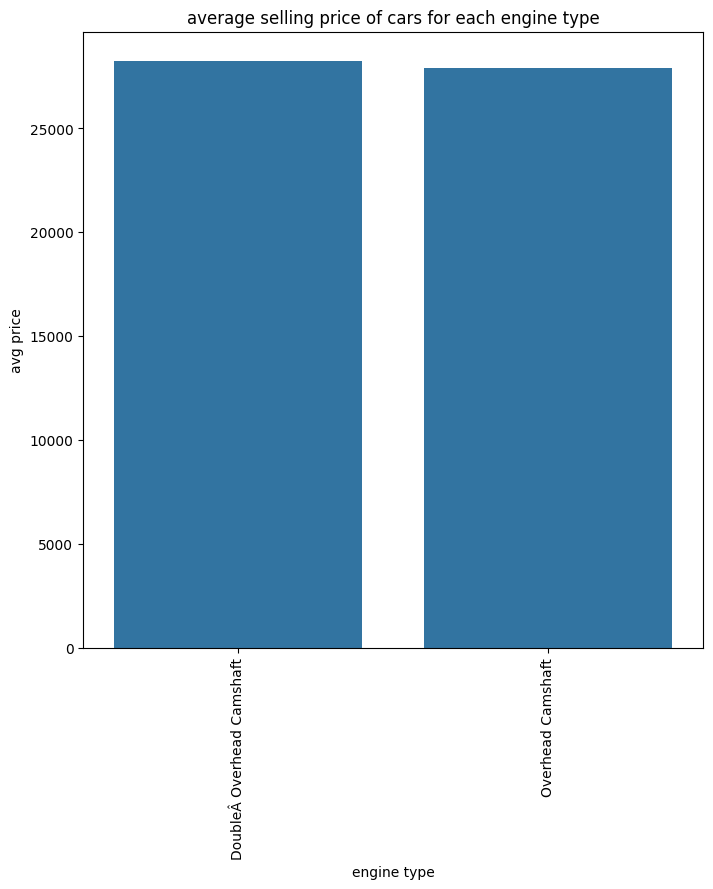

In [186]:
#8. How does the average car price differ between cars with different engine sizes
avg_price_engine= df2.groupby('Engine')['Price ($)'].mean()
plt.figure(figsize = (8,8))
sns.barplot(x = avg_price_engine.index, y = avg_price_engine.values)
plt.xlabel('engine type')
plt.ylabel('avg price')
plt.xticks(rotation = 90)
plt.title("average selling price of cars for each engine type")
plt.show()

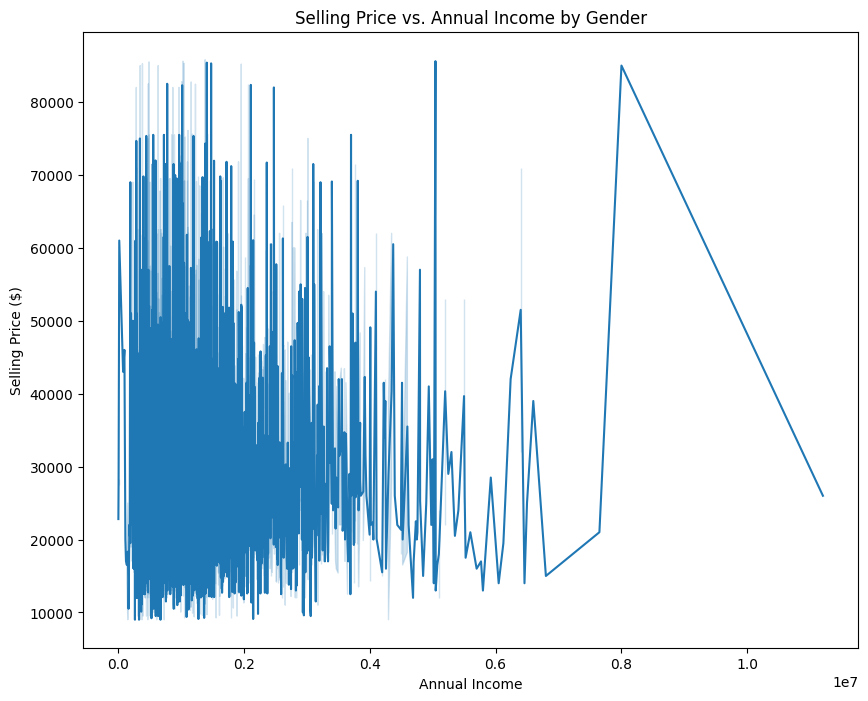

In [187]:
#9. How do car prices vary based on the customer’s annual income bracket
plt.figure(figsize = (10, 8))
sns.lineplot(x = df2['Annual Income'], y = df2['Price ($)'])
plt.title('Selling Price vs. Annual Income by Gender')
plt.xlabel('Annual Income')
plt.ylabel('Selling Price ($)')
plt.show()

In [188]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look

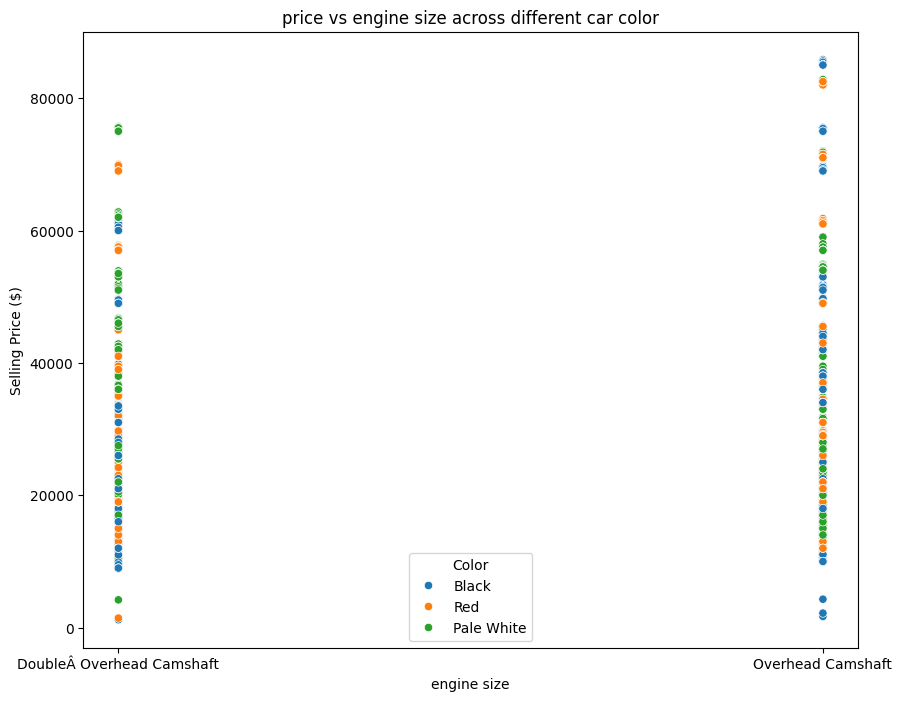

,Price ($)
Color,
Black,2.336638e+08
Pale White,1.981620e+08
Red,2.408506e+08


In [189]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation
plt.figure(figsize = (10, 8))
sns.scatterplot(x = df2['Engine'], y = df2['Price ($)'], hue = df2['Color'])
plt.title('price vs engine size across different car color')
plt.xlabel('engine size')
plt.ylabel('Selling Price ($)')
plt.show()
df2.groupby('Color')['Price ($)'].var()

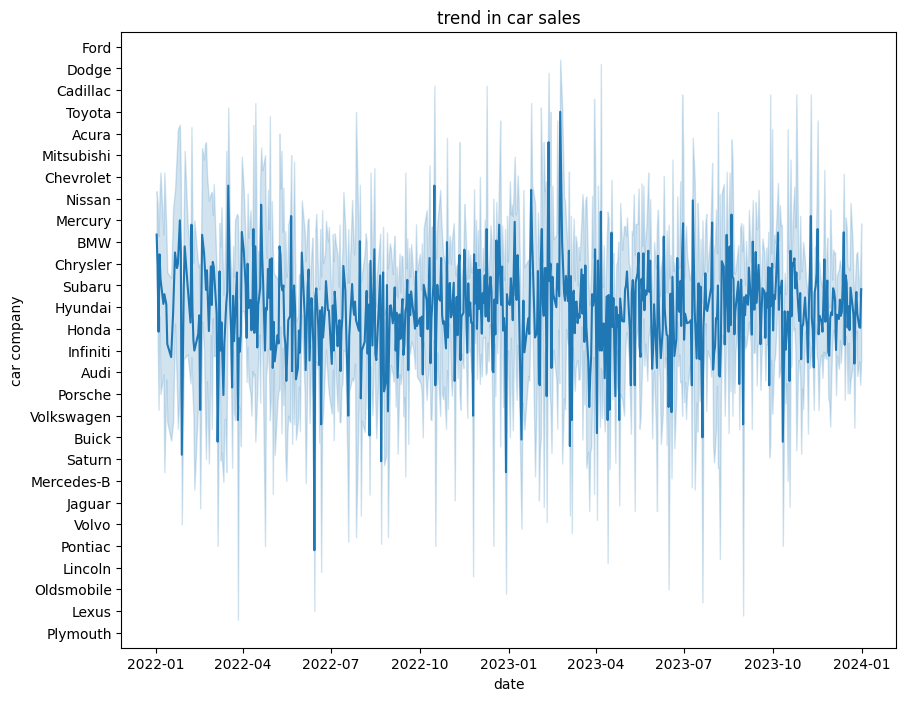

In [190]:
#12. Is there any seasonal trend in car sales based on the date of sale
plt.figure(figsize = (10, 8))
sns.lineplot(x = df2['Date'], y = df2['Company'].values)
plt.title('trend in car sales')
plt.xlabel('date')
plt.ylabel('car company')
plt.show()

<Axes: xlabel='Body Style', ylabel='Price ($)'>

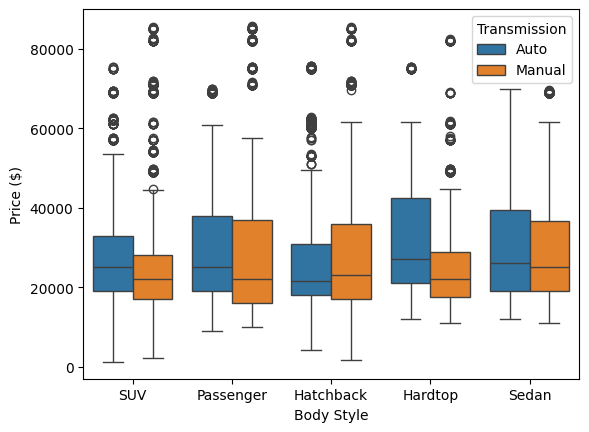

In [191]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type
sns.boxplot(x = 'Body Style', y = 'Price ($)', data = df2, hue = 'Transmission')

In [192]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact

In [193]:
#15. How does the average car price vary across different car models and engine types

In [194]:
df3 = pd.read_csv("amazon.csv")
df3

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [195]:
df3.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,object
actual_price,object
discount_percentage,object
rating,object
rating_count,object
about_product,object
user_id,object


In [196]:
df3.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [197]:
df3 = df3.dropna()

In [198]:
df3.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


In [200]:
df3['discounted_price'] = df3['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df3['actual_price'] = df3['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df3['discount_percentage'] = df3['discount_percentage'].str.replace('%', '').astype(float)
df3['rating'] = df3['rating'].replace('|', np.nan).astype(float)
df3['rating_count'] = df3['rating_count'].str.replace(',', '').astype(int)

In [201]:
df3.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,float64
actual_price,float64
discount_percentage,float64
rating,float64
rating_count,int64
about_product,object
user_id,object


In [203]:
#1. What is the average rating for each product category
df3.groupby('category')["rating"].mean()

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


In [204]:
#2. What are the top rating_count products by category
df3.groupby('category')['rating_count'].max()

,rating_count
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,1118
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4426
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,7222
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,14969
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,7352
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",5792
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",6199
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",5719


<Axes: xlabel='actual_price', ylabel='discounted_price'>

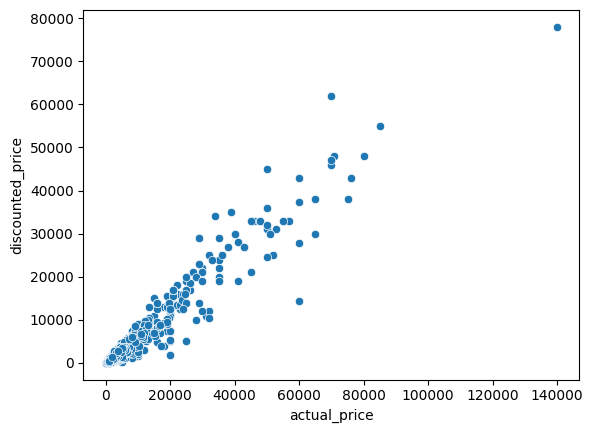

In [205]:
#3. What is the distribution of discounted prices vs. actual prices
sns.scatterplot(x = df3['actual_price'], y = df3['discounted_price'])

In [206]:
#4. How does the average discount percentage vary across categories
df3.groupby('category')["discount_percentage"].mean()

,discount_percentage
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,46.5
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",0.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",5.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",17.5


In [210]:
#5. What are the most popular product names
df3['product_name'].value_counts()

,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)",3
"Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3
"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",3
...,...
"WeCool B1 Mobile Holder for Bikes or Bike Mobile Holder for Maps and GPS Navigation, one Click Locking, Firm Gripping, Anti Shake and Stable Cradle Clamp with 360° Rotation Bicycle Phone Mount",1
"boAt Newly Launched Wave Electra with 1.81"" HD Display, Smart Calling Ultra-Seamless BT Calling Chip, 20 Built-in Watch Faces, 100 + Sports Modes, Menu Personalization, in-Built Games(Cherry Blossom)",1
"STRIFF Multi Angle Tablet/Mobile Stand. Holder for iPhone, Android, Samsung, OnePlus, Xiaomi. Portable,Foldable Stand.Perfect for Bed,Office, Home,Gift and Desktop (Black)",1


In [ ]:
#6. What are the most popular product keywords

In [211]:
#7. What are the most popular product reviews
top_10_products = df3.sort_values(by='rating_count', ascending=False).head(10)
display(top_10_products[['product_name', 'rating_count', 'rating']])

,product_name,rating_count,rating
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973,4.4
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973,4.4
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973,4.4
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,426972,4.4
400,boAt Bassheads 100 in Ear Wired Earphones with...,363713,4.1
352,boAt Bassheads 100 in Ear Wired Earphones with...,363713,4.1
584,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711,4.1
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836,4.1
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836,4.1
566,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",313832,4.1


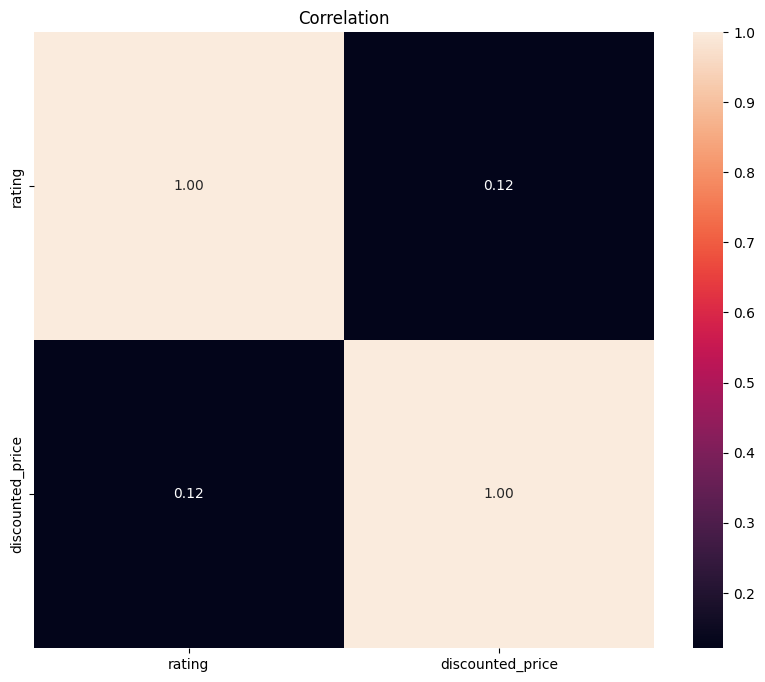

In [212]:
#8. What is the correlation between discounted_price and rating
cols = df3[['rating', 'discounted_price']]
correlation_matrix = cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation')
plt.show()

In [215]:
#9. What are the Top 5 categories based on the highest ratings
top_5_cat = df3.sort_values(by='rating', ascending=False).head(5)
display(top_5_cat[['category', 'rating']])

,category,rating
775,Computers&Accessories|Accessories&Peripherals|...,5.0
174,Computers&Accessories|Accessories&Peripherals|...,5.0
1145,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",4.8
1201,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.8
1299,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.8


In [ ]:
#10. Identify any potential areas for improvement or optimization based on the data analysis.
'''making EDA quite good and improve it by a lot so following processes in ML pathway takes less time'''

In [216]:
df4 = pd.read_csv('spotify.csv')
df4

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [230]:
df4.dtypes

,0
Artist,object
Track Name,object
Popularity,int64
Duration (ms),int64
Track ID,object


In [217]:
#1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful
df4.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


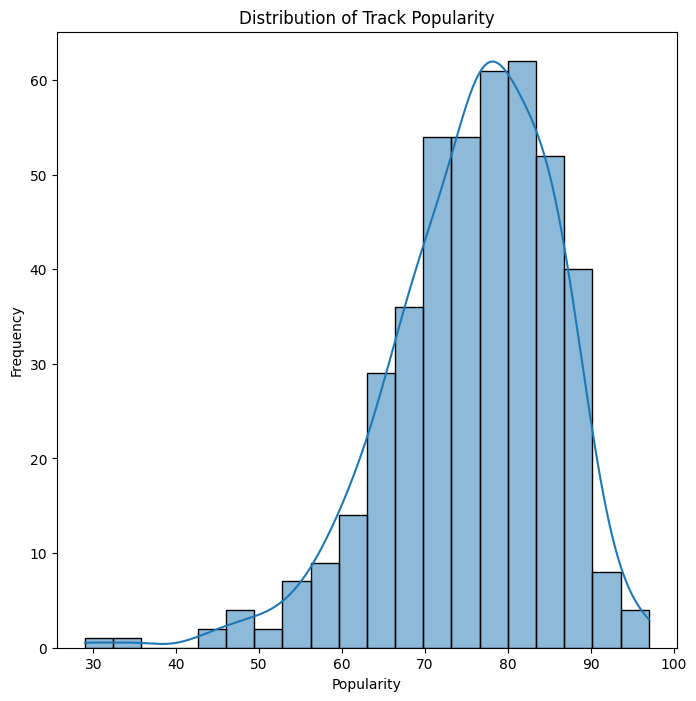

In [219]:
#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
plt.figure(figsize = (8,8))
sns.histplot(df4['Popularity'], bins=20, kde=True)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Track Popularity')
plt.show()

<Axes: xlabel='Popularity', ylabel='Duration (ms)'>

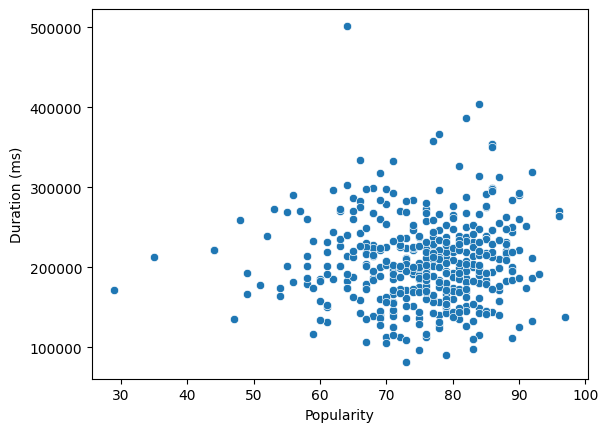

In [220]:
#3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
sns.scatterplot(x = df4['Popularity'], y = df4['Duration (ms)'])

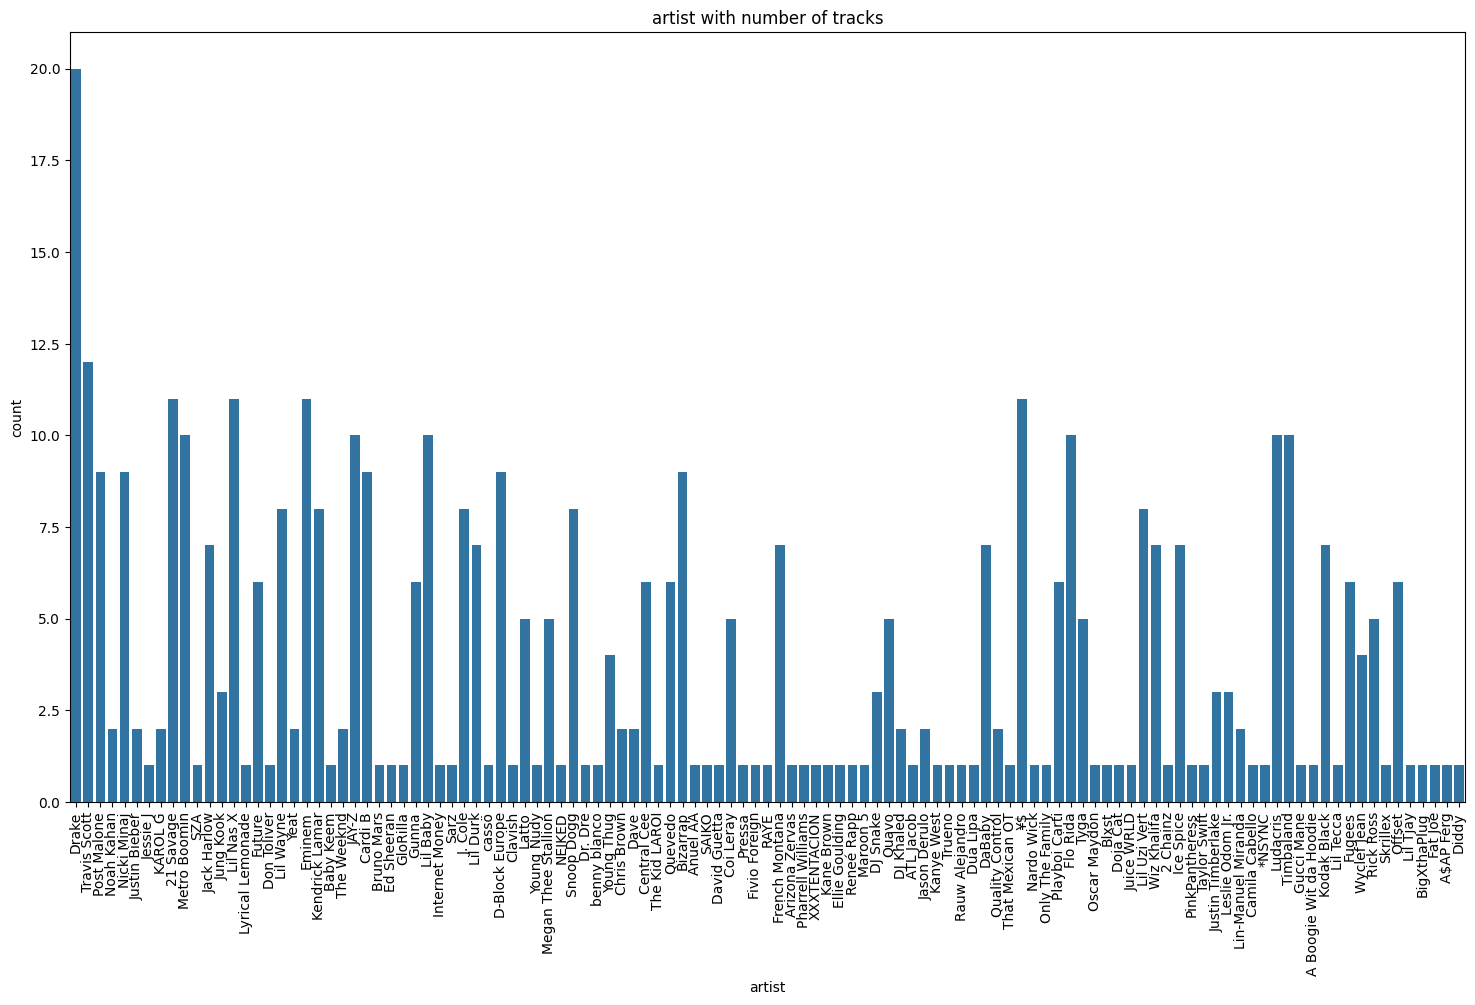

In [225]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
plt.figure(figsize= (18,10))
sns.countplot(x = 'Artist', data = df4)
plt.title('artist with number of tracks')
plt.xlabel('artist')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

In [227]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
top_5_least = df4.sort_values(by='Popularity', ascending=True).head(5)
display(top_5_least[['Artist', 'Track Name', 'Popularity']])

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
435,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47


In [229]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
df4.groupby("Artist")['Popularity'].mean()

,Popularity
Artist,
*NSYNC,67.000000
2 Chainz,72.000000
21 Savage,84.181818
A Boogie Wit da Hoodie,80.000000
A$AP Ferg,69.000000
...,...
Young Nudy,67.000000
Young Thug,73.750000
benny blanco,72.000000


In [ ]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

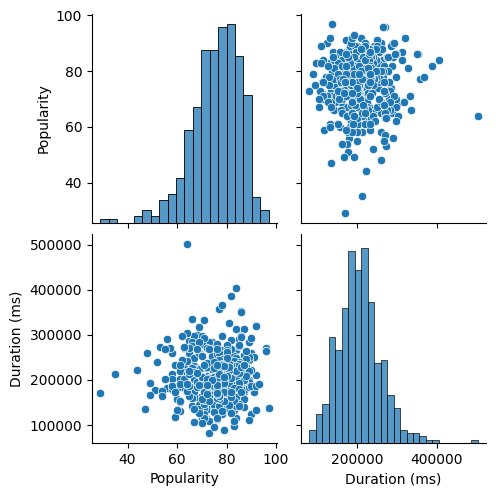

In [232]:
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot
sns.pairplot(df4[['Popularity','Duration (ms)']])

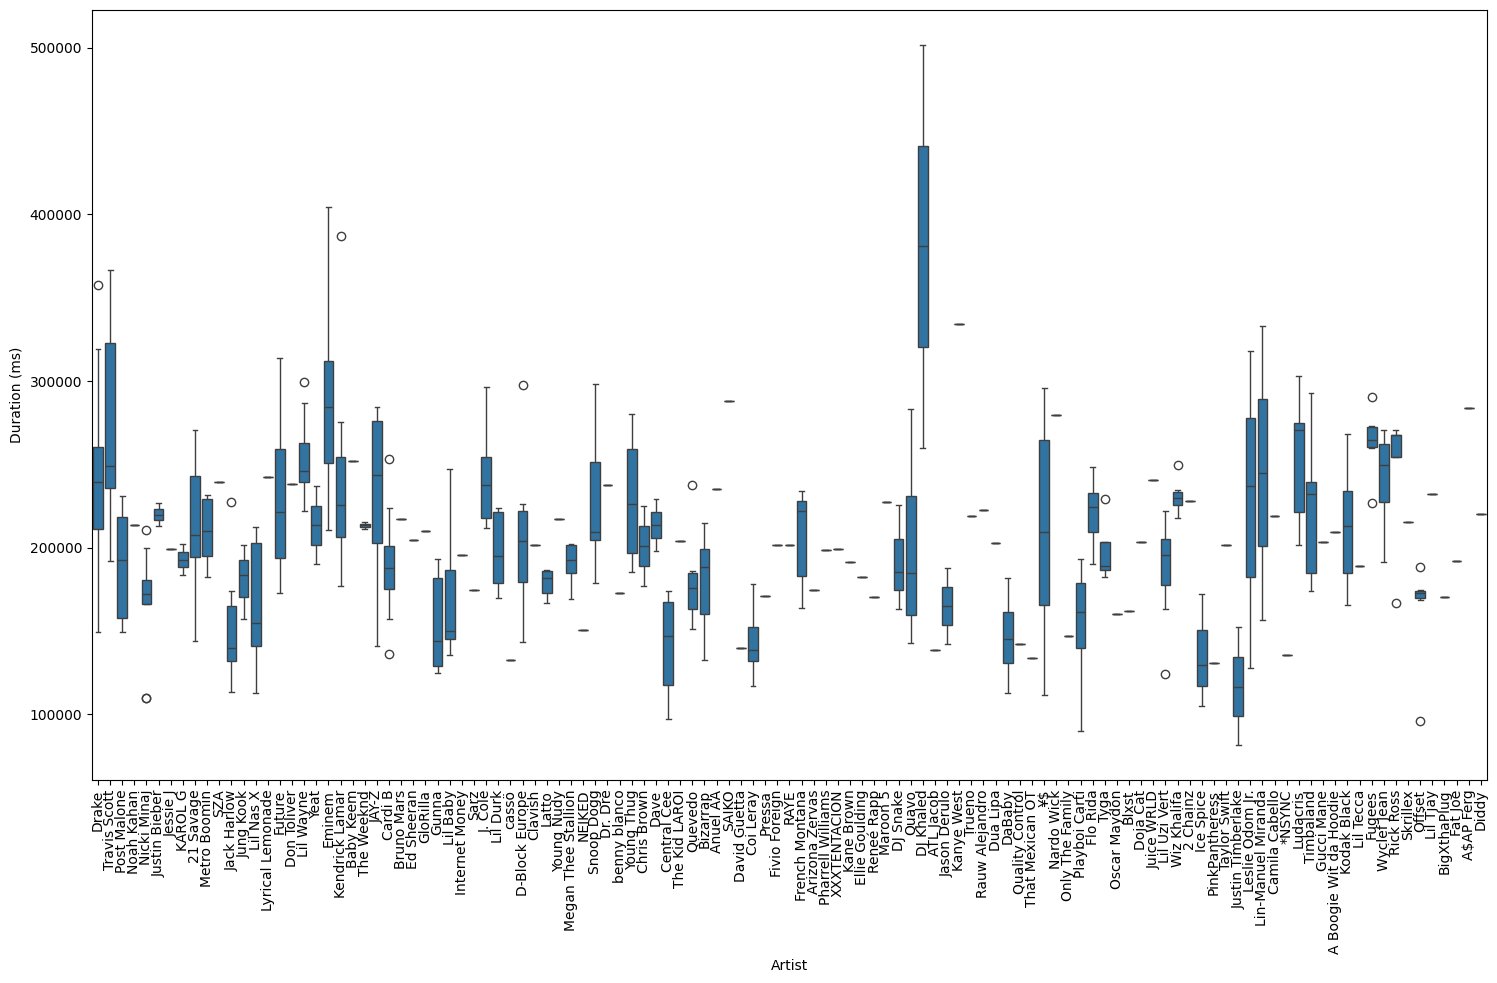

In [235]:
#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
plt.figure(figsize=(18,10))
sns.boxplot(data = df4, x = "Artist", y = 'Duration (ms)')
plt.xticks(rotation = 90)
plt.show()

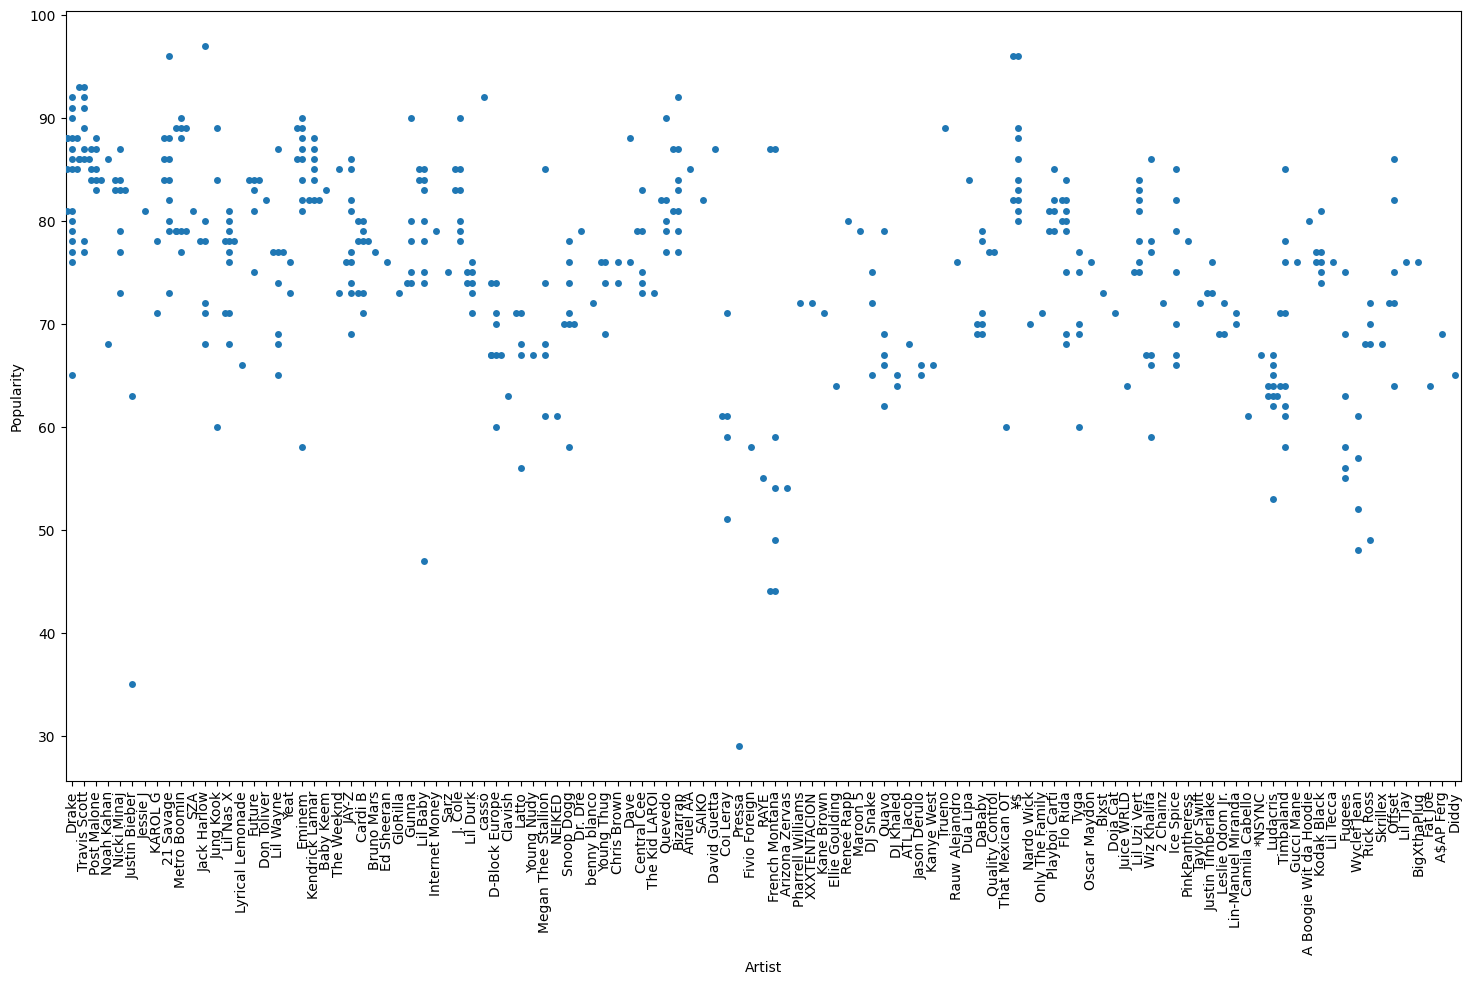

In [236]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
plt.figure(figsize=(18,10))
sns.swarmplot(data = df4, x = "Artist", y = 'Popularity')
plt.xticks(rotation = 90)
plt.show()